RNN - LSTM Architecture for the model

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH="data_10.json"

# load data from json
with open(DATASET_PATH, "r") as fp:
    data = json.load(fp)

# convert lists into numpy arrays 
x = np.array(data["mfcc"])
y = np.array(data["labels"])

In [3]:
# create train, validation and test sets
TEST_SIZE=0.25
VAL_SIZE=0.2 

# create train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)
    
# create train/val split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SIZE)

In [4]:
# input shape
input_shape = (x_train.shape[1], x_train.shape[2])
input_shape

(130, 13)

In [5]:
# Build CNN network
model = keras.Sequential()
model.add(keras.layers.Input(shape=input_shape))

# 2-LSTM layers
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(64))

# Dense Layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(3, activation='softmax'))

In [6]:
# compile the network
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 64)             │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,347 (224.01 KB)

 Trainable params: 57,347 (224.01 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# train the CNN 
history = model.fit(
    x_train, 
    y_train,  
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=32
)

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.6451 - loss: 0.8906 - val_accuracy: 0.6572 - val_loss: 0.7341
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.6871 - loss: 0.7116 - val_accuracy: 0.7329 - val_loss: 0.6111
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.7781 - loss: 0.5761 - val_accuracy: 0.7943 - val_loss: 0.4898
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8245 - loss: 0.4601 - val_accuracy: 0.8322 - val_loss: 0.3979
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.8503 - loss: 0.3826 - val_accuracy: 0.8487 - val_loss: 0.3541
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.8763 - loss: 0.3311 - val_accuracy: 0.8558 - val_loss: 0.3286
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.8584 - loss: 0.3154 - val_accuracy: 0.8558 - val_loss: 0.3160
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.8731 - loss: 0.2915 - val_accuracy: 0

In [8]:
# evaluate the CNN on the test_set
test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9011 - loss: 0.2128
Accuracy on test set is: 0.8977272510528564


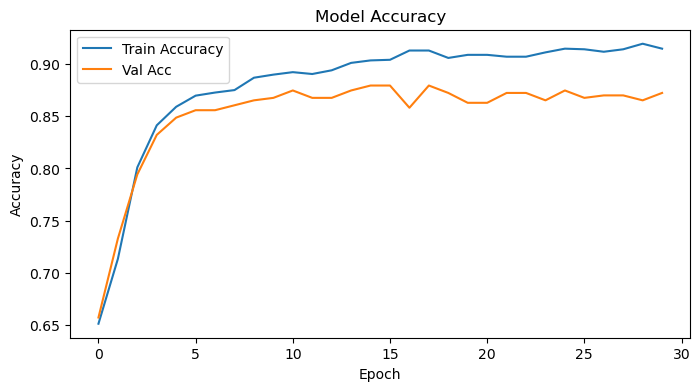

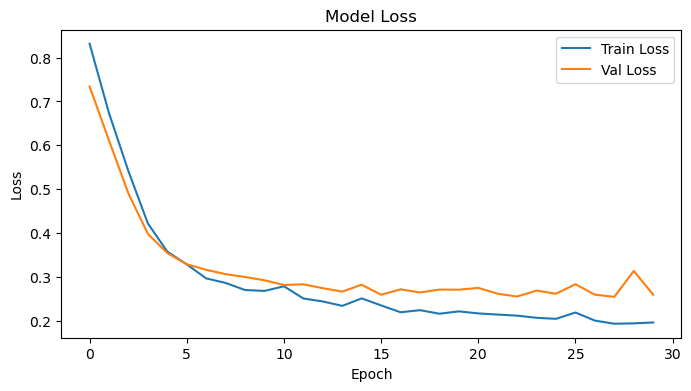

In [21]:
# Plot Training History for Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Training History for Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [33]:
# make predictions on a sample test data
X = x_test[700]
Y = y_test[700]

X = X[np.newaxis, ...]
prediction = model.predict(X)

# extract index with max value
predicted_index = np.argmax(prediction, axis=1) 

print(f"Expected index: {Y}, \nPredicted Index: {predicted_index[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Expected index: 1, 
Predicted Index: 1


In [35]:
# as a keras model
model.save('models/heart_sound_model_v4_0001.keras')
# as a h5 model
model.save("models/heart_sound_model_v4_0001.h5")